In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

In [2]:
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)

In [3]:
n = max(max(df[0]), max(df[1]))
A = np.zeros([n,n], dtype=int)
for index, row in df.iterrows():
    if int(row[2]) > 0:
        A[int(row[0])-1, int(row[1])-1] = int(row[2])
A  

array([[0, 8, 6, ..., 0, 0, 0],
       [8, 0, 8, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<AxesSubplot: >

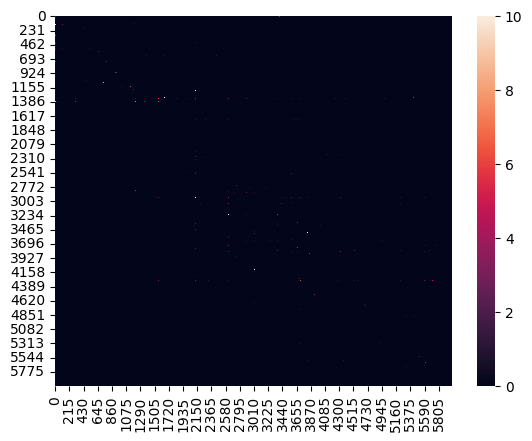

In [4]:
sns.heatmap(A)

In [5]:
df_list = []
for i in range(n):
    node = {"Node": i, "Influenced": np.size(np.nonzero(A[i,:])), "Influencing": np.size(np.nonzero(A[:,i])), 
            "Total Influenced": np.sum(A[i,:]), "Total Influencing": np.sum(A[:,i])}
    df_list.append(node)
df = pd.DataFrame(df_list)
df = df.set_index("Node")
df

,Influenced,Influencing,Total Influenced,Total Influencing
Node,,,,
0,206,226,508,801
1,43,40,154,125
2,0,12,0,57
3,60,54,203,168
4,3,3,7,7
...,...,...,...,...
6000,0,0,0,0
6001,0,1,0,1
6002,0,1,0,1


In [7]:
df[df.columns[1:]].describe()

,Followers Count,Following Count,Followers Weight,Following Weight
count,6005.000000,6005.000000,6005.000000,6005.000000
mean,5.333722,5.333722,10.482431,10.482431
std,18.386005,16.696767,33.855493,37.894774
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,8.000000,7.000000
max,753.000000,535.000000,927.000000,1043.000000


In [42]:
sns.set_theme()
sns.set_palette("husl")

[None]

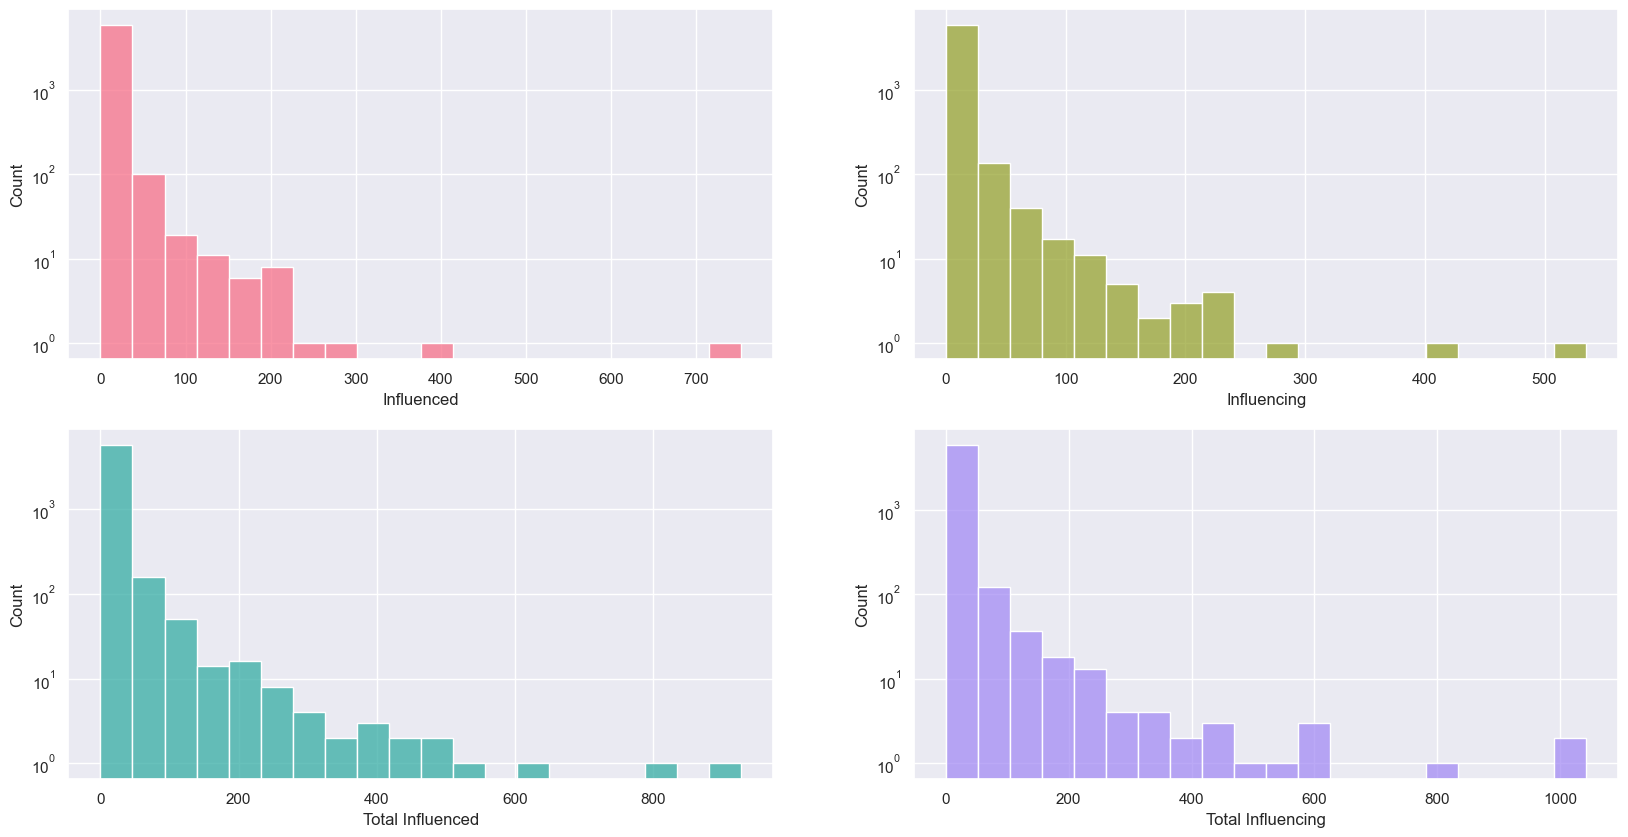

In [56]:
colors = sns.color_palette("husl", 4)
f, ax = plt.subplots(2, 2, figsize=(20,10))
sns.histplot(df['Influenced'], bins=20, ax=ax[0][0], color=colors[0])
ax[0][0].set(yscale="log")
sns.histplot(df['Influencing'], bins=20, ax=ax[0][1], color=colors[1])
ax[0][1].set(yscale="log")
sns.histplot(df['Total Influenced'], bins=20, ax=ax[1][0], color=colors[2])
ax[1][0].set(yscale="log")
sns.histplot(df['Total Influencing'], bins=20, ax=ax[1][1], color=colors[3])
ax[1][1].set(yscale="log")

In [103]:
def influence(influenced, current):
    new_current = set()
    for i in current:
        followers = np.nonzero(A[:,i])[0].tolist()
        for follower in followers:
            if not influenced[follower]:
                influenced[follower] = 1
                new_current.add(follower)
    return influenced, list(new_current)
        
    

reach = []
for i in range(n):
    influenced = np.zeros(n)
    reach_dict = {}
    influenced[i] = 1
    current = [i]
    for t in range(5):        
        new_influenced, new_current = influence(influenced, current)
        influenced, current = new_influenced, new_current
        reach_dict[f"Reach {t+1}"] = np.size(np.nonzero(influenced))
    reach.append(reach_dict)
    if i % 100 == 0:
        print(f"{i+1} users done")
reach_df = pd.DataFrame(reach)

1 users done
101 users done
201 users done
301 users done
401 users done
501 users done
601 users done
701 users done
801 users done
901 users done
1001 users done
1101 users done
1201 users done
1301 users done
1401 users done
1501 users done
1601 users done
1701 users done
1801 users done
1901 users done
2001 users done
2101 users done
2201 users done
2301 users done
2401 users done
2501 users done
2601 users done
2701 users done
2801 users done
2901 users done
3001 users done
3101 users done
3201 users done
3301 users done
3401 users done
3501 users done
3601 users done
3701 users done
3801 users done
3901 users done
4001 users done
4101 users done
4201 users done
4301 users done
4401 users done
4501 users done
4601 users done
4701 users done
4801 users done
4901 users done
5001 users done
5101 users done
5201 users done
5301 users done
5401 users done
5501 users done
5601 users done
5701 users done
5801 users done
5901 users done
6001 users done


In [105]:
reach_df.describe()

,Reach 1,Reach 2,Reach 3,Reach 4,Reach 5
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,6.333722,241.655620,1583.496919,3356.073106,3992.379684
std,16.696767,330.915257,1189.692051,1470.441103,1427.694389
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,18.000000,424.000000,2952.000000,4425.000000
50%,3.000000,100.000000,1582.000000,4066.000000,4570.000000
75%,5.000000,379.000000,2462.000000,4374.000000,4608.000000
max,536.000000,2651.000000,4418.000000,4609.000000,4644.000000


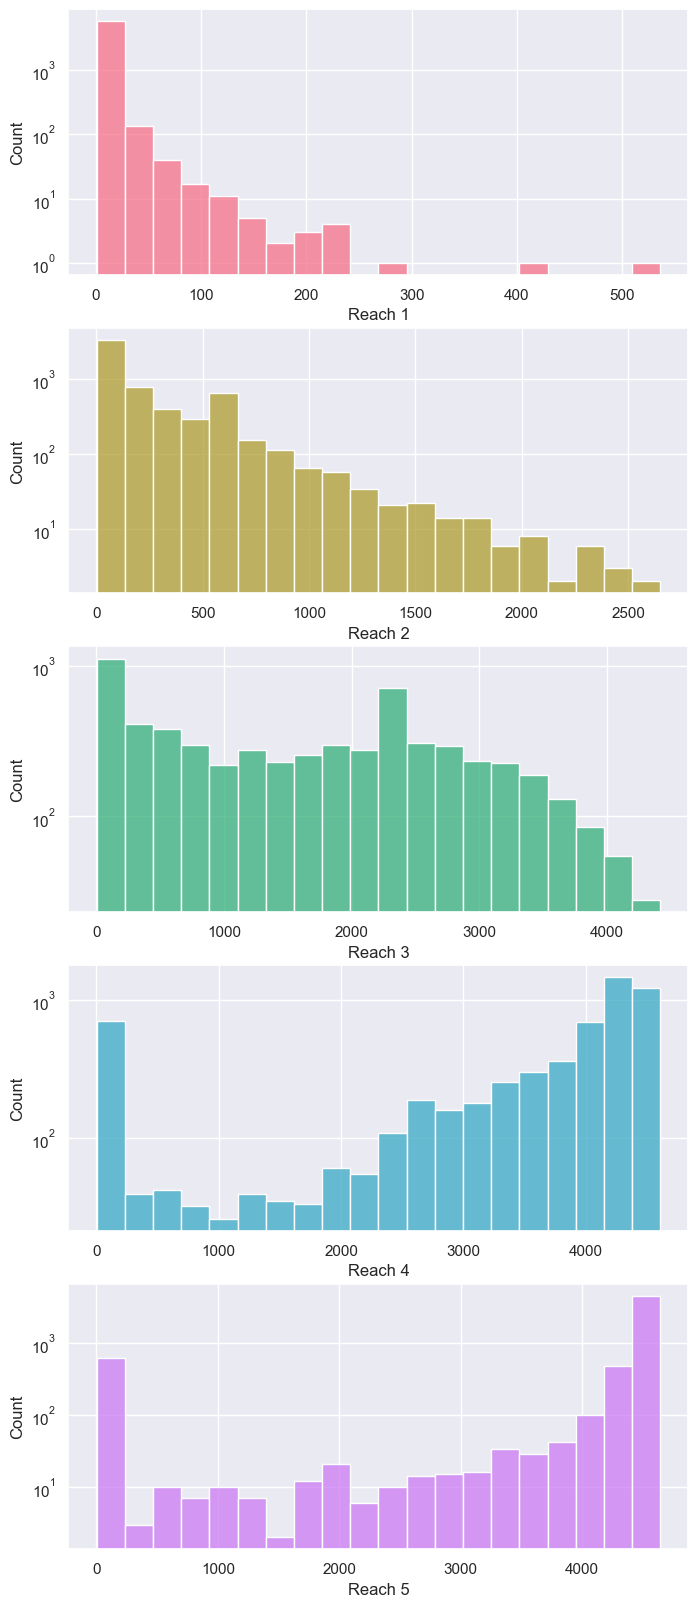

In [111]:
colors = sns.color_palette("husl", 5)
f, ax = plt.subplots(5, figsize=(8,20))
for t in range(5):
    sns.histplot(reach_df[f'Reach {t+1}'], bins=20, ax=ax[t], color=colors[t])
    ax[t].set(yscale="log")

In [115]:
df.to_csv("graph.csv")
reach_df.to_csv("graph_reach.csv")

In [78]:
graph = pd.read_csv("graph.csv")
graph_reach = pd.read_csv("graph_reach.csv")

In [79]:
graph

,Node,Influenced,Influencing,Total Influenced,Total Influencing
0,0,206,226,508,801
1,1,43,40,154,125
2,2,0,12,0,57
3,3,60,54,203,168
4,4,3,3,7,7
...,...,...,...,...,...
6000,6000,0,0,0,0
6001,6001,0,1,0,1
6002,6002,0,1,0,1
6003,6003,0,1,0,1


In [120]:
threshold = []
for i in range(n):
    myInf = graph.at[i, "Total Influencing"]
    otherInf = graph.at[i, "Total Influenced"]
    thr = 0.2*otherInf
    thr = max(thr, 1)
    threshold.append(thr)


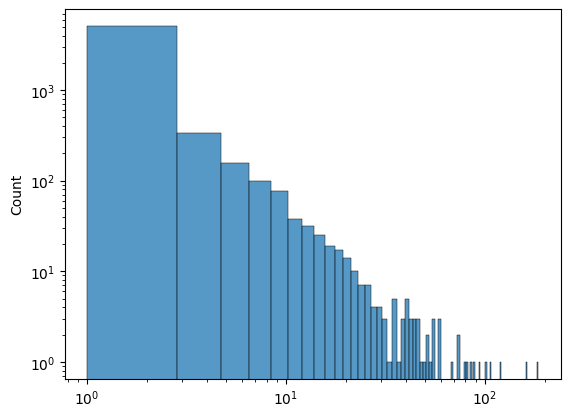

In [121]:
ax = sns.histplot(threshold, bins=100)
ax.set_xscale('log')
ax.set_yscale('log')

In [122]:
graph['Threshold'] = threshold

In [83]:
budget = []
for i in range(n):
    reach = max(1, graph_reach.at[i, 'Reach 1'])
    noise = int(0.2*reach)
    reach += max(random.randrange(-noise-1, noise+1), 1)
    budget.append(1000*reach)

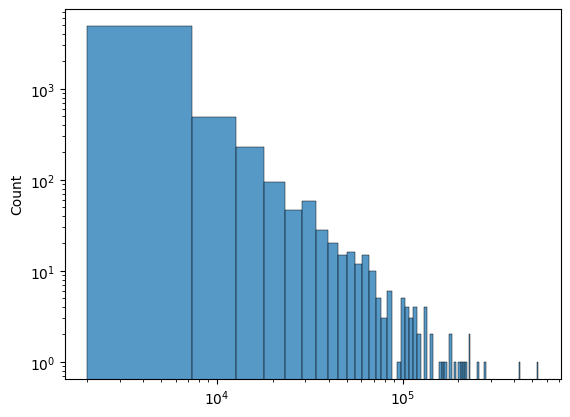

In [84]:
ax = sns.histplot(budget, bins=100)
ax.set_xscale('log')
ax.set_yscale('log')

In [85]:
graph['Budget'] = budget

In [86]:
graph

,Node,Influenced,Influencing,Total Influenced,Total Influencing,Threshold,Budget
0,0,206,226,508,801,28466.441190,228000
1,1,43,40,154,125,1259.098381,42000
2,2,0,12,0,57,3249.000000,14000
3,3,60,54,203,168,1980.936456,56000
4,4,3,3,7,7,18.520259,5000
...,...,...,...,...,...,...,...
6000,6000,0,0,0,0,1.000000,2000
6001,6001,0,1,0,1,1.000000,3000
6002,6002,0,1,0,1,1.000000,3000
6003,6003,0,1,0,1,1.000000,3000


In [87]:
for col in graph_reach.columns[1:]:
    graph[col] = graph_reach[col]
graph

,Node,Influenced,Influencing,Total Influenced,Total Influencing,Threshold,Budget,Reach 1,Reach 2,Reach 3,Reach 4,Reach 5
0,0,206,226,508,801,28466.441190,228000,227,2651,4418,4609,4644
1,1,43,40,154,125,1259.098381,42000,41,864,3593,4539,4625
2,2,0,12,0,57,3249.000000,14000,13,475,3160,4495,4624
3,3,60,54,203,168,1980.936456,56000,55,1208,3976,4560,4631
4,4,3,3,7,7,18.520259,5000,4,392,2947,4465,4621
...,...,...,...,...,...,...,...,...,...,...,...,...
6000,6000,0,0,0,0,1.000000,2000,1,1,1,1,1
6001,6001,0,1,0,1,1.000000,3000,2,2,2,2,2
6002,6002,0,1,0,1,1.000000,3000,2,6,137,1863,4174
6003,6003,0,1,0,1,1.000000,3000,2,537,2424,4375,4609


In [123]:
graph.to_csv("synthetic.csv", index=False)